### Import Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Load Dataset

In [3]:
df = pd.read_csv('../data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Prepation

In [4]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Mengecek missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Cek Variasi Spesiesnya

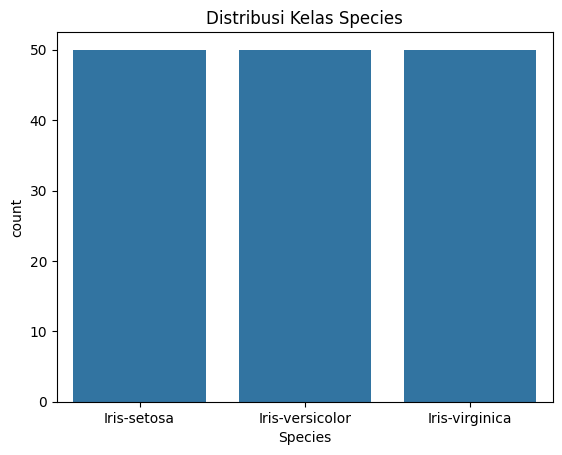

In [ ]:
# Melihat distribusi kelas pada kolom 'Species'
sns.countplot(data=df, x='Species')
plt.title('Distribusi Kelas Species')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df['Species'])

In [13]:
# Fitur untuk Clustering
X = df.drop(["Id", "Species", "SpeciesEncoded"], axis=1)

In [15]:
X[7:15]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2


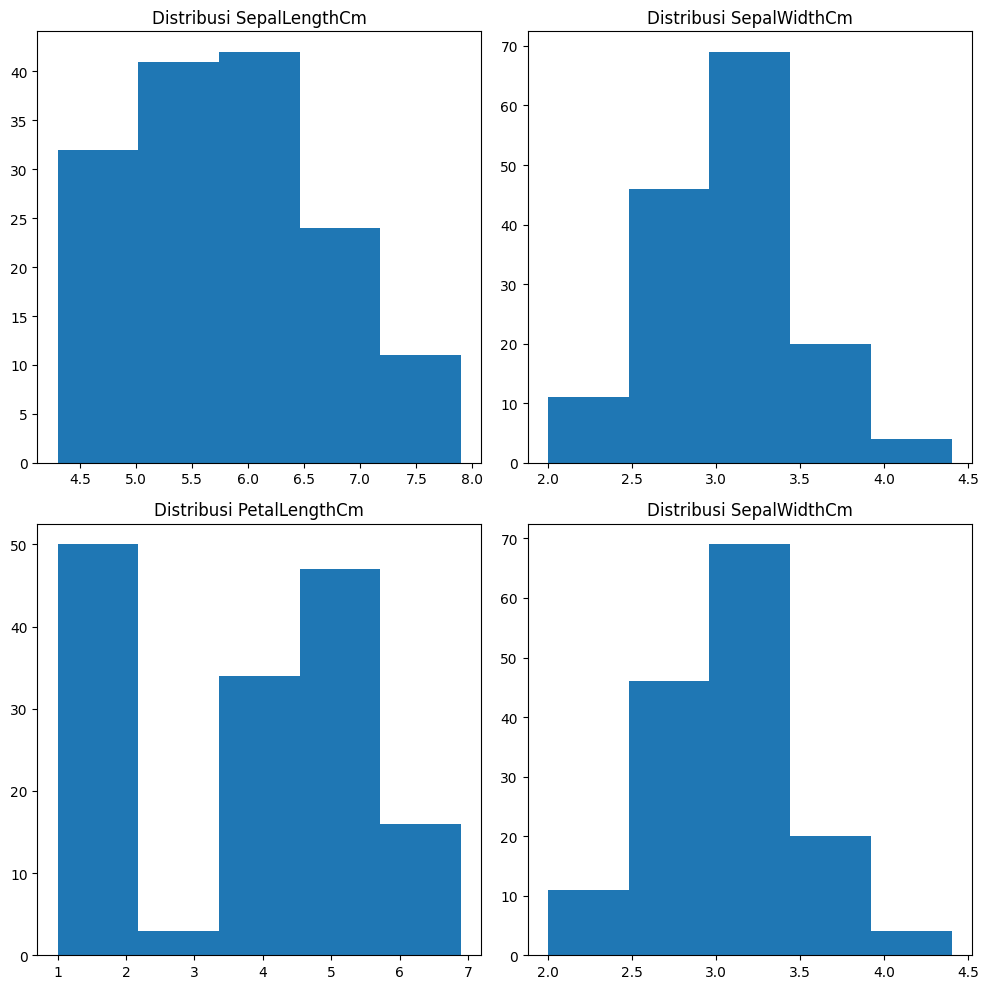

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1 - SepalLengthCm
axes[0,0].set_title('Distribusi SepalLengthCm')
axes[0,0].hist(X['SepalLengthCm'], bins=5)

# Histogram 2 - SepalWidthCm
axes[0,1].set_title('Distribusi SepalWidthCm')
axes[0,1].hist(X['SepalWidthCm'], bins=5)

# Histogram 3 - PetalLengthCm
axes[1,0].set_title('Distribusi PetalLengthCm')
axes[1,0].hist(X['PetalLengthCm'], bins=5)

# Histogram 4 - PetalWidthCm
axes[1,1].set_title('Distribusi PetalWidthCm')
axes[1,1].hist(X['PetalWidthCm'], bins=5)

plt.tight_layout()
plt.show()

### StandardScaler

In [21]:
scaler = StandardScaler()

# Re-initialize X from the original dataframe 'df';
# This entures X is a DataFrame with named columns for indexing before scaling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Inertia

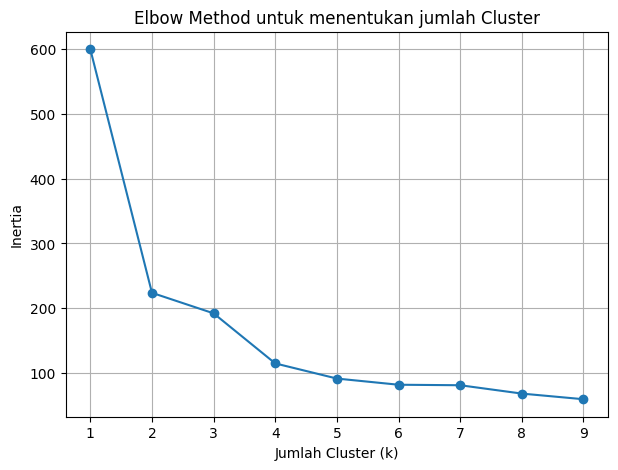

In [22]:
inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method untuk menentukan jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Mendeklarasikan Model

In [23]:
kmeans = KMeans(
    n_clusters=3,   # Karena kita tahu ada 3 spesies pada dataset iris
    init='k-means++', 
    random_state=42
)

In [24]:
# 1. Latih model (Menentukan centroid + proses clustering)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [25]:
# 2. Prediksi cluster untuk data X
labels = kmeans.predict(X)

In [27]:
# 3. Masukan DataFrame
df['Cluster'] = labels

In [29]:
df['Cluster'] = kmeans.fit_predict(X)

print("Cluster Centers (Centroid):", df['Cluster'].unique())

Cluster Centers (Centroid): [1 2 0]


### Evaluasi Model

In [31]:
sil_score = silhouette_score(X, df['Cluster'])
print("\n==== SILOUETTE SCORE ==== ")
print("Silhouette Score:", sil_score)


==== SILOUETTE SCORE ==== 
Silhouette Score: 0.4787241921049546
